**My experiment with keras to work on MNIST database**

In [0]:
# Starting with the imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils


In [0]:
%matplotlib inline

In [4]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print trainX.shape
print testX.shape

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print trainX[0]

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

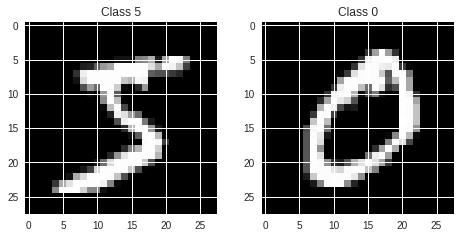

In [10]:
for i in range(2):
    plt.subplot(3,3,i+1)
    plt.imshow(trainX[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(trainY[i]))

In [26]:
trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255
print("Training matrix shape", trainX.shape)
print("Testing matrix shape", testX.shape)

('Training matrix shape', (60000, 784))
('Testing matrix shape', (10000, 784))


In [0]:
nb_classes = 10
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [36]:
model.fit(trainX, trainY,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 12s 200us/step - loss: 0.2482 - val_loss: 0.1081
Epoch 2/4
60000/60000 [==============================] - 12s 192us/step - loss: 0.1019 - val_loss: 0.0793
Epoch 3/4
60000/60000 [==============================] - 11s 191us/step - loss: 0.0705 - val_loss: 0.0672
Epoch 4/4
60000/60000 [==============================] - 11s 191us/step - loss: 0.0543 - val_loss: 0.0788


In [41]:
score = model.evaluate(testX, testY, verbose=0)
print score

0.07883918402639684


In [43]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(testX)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == testY)[0]
incorrect_indices = np.nonzero(predicted_classes != testY)[0]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  """


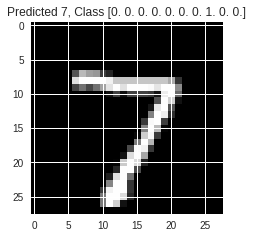

In [45]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], testY[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], testY[incorrect]))